# 참외

# 일조량 & 강수량 & 평균가격 데이터 정제 및 
# 2014 ~ 2022, 2023 ~ 2024(7월) 년도별 데이터 나누기

# (1) 일조량

날짜         0
지점         1
평균기온(℃)    3
최저기온(℃)    1
최고기온(℃)    1
dtype: int64
날짜         0
평균기온(℃)    0
dtype: int64


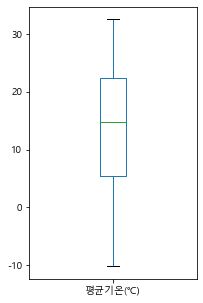

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 
plt.figure(figsize=(3, 5))

aa =pd.read_csv('chamoe.csv',encoding = 'euc-kr')
print(aa.isna().sum())

del aa['지점']
del aa['최저기온(℃)']
del aa['최고기온(℃)']

aa['날짜'] = aa['날짜'].str.replace('\t', '', regex=False)

aa= aa.interpolate(method='linear', limit_direction='both')

print(aa.isna().sum())

aa.boxplot(column=['평균기온(℃)'])
plt.grid(False)
plt.savefig('chamoe_sun_boxplot.png', format='png')

In [2]:
aa['날짜'] = pd.to_datetime(aa['날짜'])

aa.set_index(aa['날짜'], inplace=True)

aa_mean = aa['평균기온(℃)'].resample(rule='W-TUE').agg(np.mean).fillna(0)

aa_df = pd.DataFrame({"평균기온(℃)":aa_mean})

aa_3df = aa_df.rolling(window=3).mean().round(1)

aa_sun = aa_3df.dropna()

aa_sun.drop(index=['2024-08-06'])

aa_sun_2022 = aa_sun.loc[:'2022-12-31']
aa_sun_2023 = aa_sun.loc['2023-01-01':]


aa_sun_2022.to_csv("chamoe_sun_2022.csv", index = True)
aa_sun_2023.to_csv("chamoe_sun_2023.csv", index = True)

# (2) 강수량

날짜            0
지점            0
강수량(mm)    2403
dtype: int64
날짜         0
지점         0
강수량(mm)    0
dtype: int64


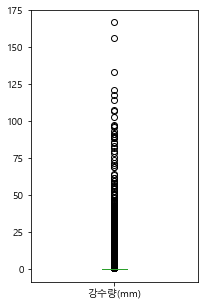

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(3, 5))

bb = pd.read_csv('chamoe_rain.csv',encoding = 'euc-kr')

print(bb.isna().sum())
bb['강수량(mm)'] = bb['강수량(mm)'].fillna(0)
print(bb.isna().sum())

bb.boxplot(column=['강수량(mm)'])
plt.grid(False)
plt.savefig('chamoe_rain_boxplot.png', format='png')

In [4]:
del bb['지점']

bb['날짜'] = pd.to_datetime(bb['날짜'])

bb['강수량(mm)'] = bb['강수량(mm)'].fillna(0)

bb.set_index(bb['날짜'], inplace=True)

bb1=bb['강수량(mm)'].resample('W-TUE').agg(np.sum).fillna(0)

bb2 = pd.DataFrame({"강수량(mm)":bb1})

bb_rolling = bb2.rolling(window=3).sum()

bb_rain = bb_rolling.dropna()

bb_rain.drop(index=['2024-08-06'])

bb_rain_2022 = bb_rain.loc[:'2022-12-31']
bb_rain_2023 = bb_rain.loc['2023-01-01':]

bb_rain_2022.to_csv("chamoe_rain_2022.csv", index = True)
bb_rain_2023.to_csv("chamoe_rain_2023.csv", index = True)

# (3) 평균 가격 전체

Unnamed: 0    0
DATE          0
품목            0
품종            0
거래단위          0
등급            0
평균가격          0
전일            0
전년            0
dtype: int64


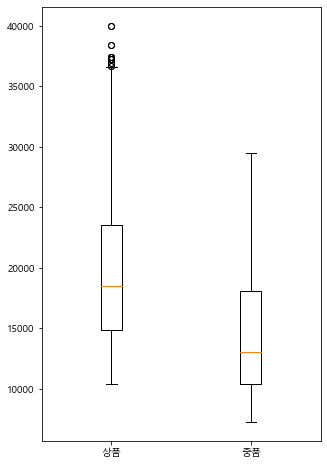

In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

DD=pd.read_excel('참외원본.xlsx')
DD.to_csv('DD2.csv')

DD2=pd.read_csv('DD2.csv',low_memory=False,encoding='utf-8')

print(DD2.isna().sum())

df2 = DD2[DD2['등급']=='상품']
df3 = DD2[DD2['등급']=='중품']

plt.figure(figsize=(5, 8))
plt.boxplot([df2['평균가격'], df3['평균가격']], labels=['상품', '중품'])

plt.grid(False)
plt.savefig('chamoe_price_boxplot.png', format='png')

In [6]:
DD2['DATE'] = DD2['DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

DD3=DD2.sort_values(by='DATE', ascending=True)

DD5=DD3.loc[:,'DATE':'평균가격']

DD5.set_index(DD5['DATE'], inplace=True)

DD6=DD5['평균가격'].resample('W-TUE').agg(np.mean).fillna(0).round()

DD6_all = DD6.loc[:'2022-12-31']

DD6_all.to_csv("chamoe_price_all.csv", index = True)

# (4) 평균가격(품종=참외전체, 등급 = 중품)

In [7]:
import pandas as pd
import numpy as np

DD=pd.read_excel('참외원본.xlsx')
DD.to_csv('DD2.csv')

DD2=pd.read_csv('DD2.csv',low_memory=False,encoding='utf-8')

print(DD2.isna().sum())

DD2['DATE'] = DD2['DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

DD3=DD2.sort_values(by='DATE', ascending=True)

Unnamed: 0    0
DATE          0
품목            0
품종            0
거래단위          0
등급            0
평균가격          0
전일            0
전년            0
dtype: int64


In [8]:
print(DD3[(DD3['품종']=='참외(전체)') & (DD3['등급']=='중품')]['평균가격'].std())
print(DD3[(DD3['품종']=='참외(전체)') & (DD3['등급']=='상품')]['평균가격'].std())

4862.150787941071
6014.232423623693


In [9]:
DD4=DD3[(DD3['품종']=='참외(전체)') & (DD3['등급']=='중품')]

DD5=DD4.loc[:,'DATE':'평균가격']

DD5.set_index(DD5['DATE'], inplace=True)

DD6=DD5['평균가격'].resample('W-TUE').agg(np.mean).fillna(0).round()

DD6_2022 = DD6.loc[:'2022-12-31']
DD6_2023 = DD6.loc['2023-01-01':]

DD6_2022.to_csv("chamoe_price_2022.csv", index = True)
DD6_2023.to_csv("chamoe_price_2023.csv", index = True)

# 일조량 & 강수량 & 평균가격 데이터 결합

# (1) 2014 ~ 2022

In [1]:
import pandas as pd

app=pd.read_csv('chamoe_price_2022.csv',low_memory=False,encoding='utf-8')
app_rain=pd.read_csv('chamoe_rain_2022.csv',low_memory=False,encoding='utf-8')
app_sun=pd.read_csv('chamoe_sun_2022.csv',low_memory=False,encoding='utf-8')

app['날짜'] = app['DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
app_rain['날짜'] = app_rain['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
app_sun['날짜'] = app_sun['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
app=app.drop('DATE',axis=1)

aa_1=pd.merge(app_sun,app_rain,on='날짜')
aa_11=pd.merge(aa_1,app,on='날짜')
aa_11 = aa_11[(aa_11['평균가격'] !=0)]

aa_11.to_csv("chamoe_2022_fin.csv", index = True)

# (2) 2023 ~ 2024(7월)

In [2]:
import pandas as pd

app2=pd.read_csv('chamoe_price_2023.csv',low_memory=False,encoding='utf-8')
app2_rain=pd.read_csv('chamoe_rain_2023.csv',low_memory=False,encoding='utf-8')
app2_sun=pd.read_csv('chamoe_sun_2023.csv',low_memory=False,encoding='utf-8')

app2['날짜'] = pd.to_datetime(app2['DATE'])
app2_rain['날짜'] = pd.to_datetime(app2_rain['날짜'])
app2_sun['날짜'] = pd.to_datetime(app2_sun['날짜'])
app2=app2.drop('DATE',axis=1)

aa_2=pd.merge(app2_sun,app2_rain,on='날짜')
aa_22=pd.merge(aa_2,app2,on='날짜')
aa_22 = aa_22[(aa_22['평균가격'] !=0)]

aa_22.to_csv("chamoe_2023_fin.csv", index = True)

# (3) 전체 데이터

In [3]:
import pandas as pd

app=pd.read_csv('chamoe_price_all.csv',low_memory=False,encoding='utf-8')
app_rain=pd.read_csv('chamoe_rain_2022.csv',low_memory=False,encoding='utf-8')
app_sun=pd.read_csv('chamoe_sun_2022.csv',low_memory=False,encoding='utf-8')

app['날짜'] = app['DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
app_rain['날짜'] = app_rain['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
app_sun['날짜'] = app_sun['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
app=app.drop('DATE',axis=1)

aa_1=pd.merge(app_sun,app_rain,on='날짜')
aa_11=pd.merge(aa_1,app,on='날짜')
aa_11 = aa_11[(aa_11['평균가격'] !=0)]

aa_11.to_csv("chamoe_all.csv", index = True)

# 산점도 비교 그래프

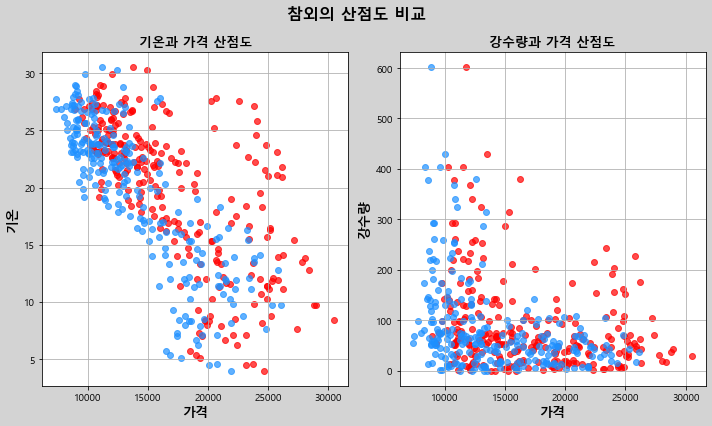

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams as rc

rc['font.family'] = 'Malgun Gothic'

ap = pd.read_csv('chamoe_all.csv',encoding = 'utf-8')
aa = pd.read_csv('chamoe_2022_fin.csv',encoding='utf-8')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
fig.patch.set_facecolor('lightgrey')
fig.suptitle('참외의 산점도 비교', fontsize=16, fontweight='bold')

filter = ap[(ap['평균가격'] !=0)]

# (기온)
ax1.scatter(filter['평균가격'],filter['평균기온(℃)'],color= 'r', alpha=0.7)
ax1.scatter(aa['평균가격'],aa['평균기온(℃)'],color= 'dodgerblue', alpha=0.7)

ax1.set_title('기온과 가격 산점도', fontsize=13, fontweight='bold') 
ax1.set_xlabel('가격', fontsize=13, fontweight='bold')
ax1.set_ylabel('기온', fontsize=13, fontweight='bold')
ax1.grid(True)

# (강수량)
ax2.scatter(filter['평균가격'],filter['강수량(mm)'],color= 'r', alpha=0.7)
ax2.scatter(aa['평균가격'],aa['강수량(mm)'],color= 'dodgerblue', alpha=0.7)

ax2.set_title('강수량과 가격 산점도', fontsize=13, fontweight='bold') 
ax2.set_xlabel('가격', fontsize=13, fontweight='bold')
ax2.set_ylabel('강수량', fontsize=13, fontweight='bold')
ax2.grid(True)

plt.tight_layout()

plt.savefig('chamoe_scatter.png', format='png')

plt.show()

# 참외가격 예측모델

# (1) 일조량

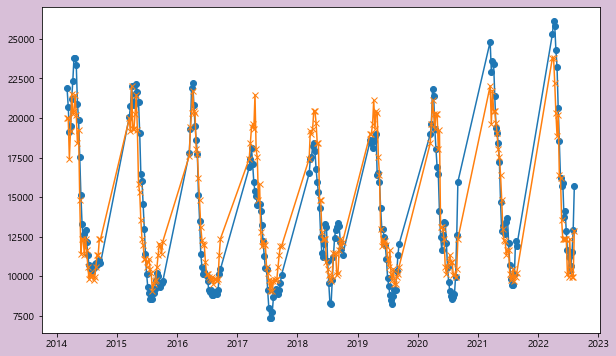

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc


yy =pd.read_csv('chamoe_2022_fin.csv',low_memory=False,encoding='utf-8')
yy_1 = yy[(yy['평균가격'] !=0)]

X = yy_1['평균기온(℃)']
y = yy_1['평균가격']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=4200
)      

params = {
    "n_estimators": 1600,
    "max_depth": 2,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

reg = ensemble.GradientBoostingRegressor(**params)

reg.fit(X_train, y_train)

a=[]
for i in yy_1['평균기온(℃)']:
    a.append(reg.predict([[i]]))
df = pd.DataFrame(a, columns=['예측가격'])

yy_1['DATE'] = yy_1['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
yy_1 = yy_1.reset_index(drop=True)
rr=pd.concat([yy_1,df],axis=1)


# 예측비교 그래프
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('thistle')

plt.plot(rr['DATE'], rr['평균가격'], label='Series 1', marker='o')
plt.plot(rr['DATE'], rr['예측가격'], label='Series 2', marker='x')
plt.savefig('chamoe_sun_plot.png', format='png')
plt.show()

In [15]:
rr['예측-평균']=rr['평균가격']-rr['예측가격']
rr['예측-평균']=rr['예측-평균'].abs().round(2)
rr['예측-평균'].mean()

1413.343305785124

# (2) 강수량

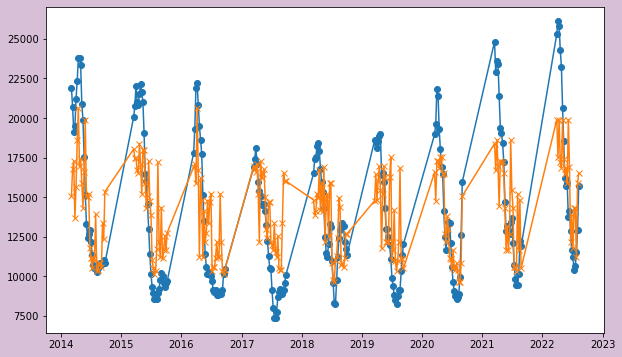

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams as rc

ch =pd.read_csv('chamoe_2022_fin.csv',low_memory=False,encoding='utf-8')
ch_1 = ch[(ch['평균가격'] !=0)]

X = ch_1['강수량(mm)']
y = ch_1['평균가격']
X_train, X_test, y_train, y_test = train_test_split(                        
    X, y, test_size=0.1, random_state=4200
)    

params = {
    "n_estimators": 1600,
    "max_depth": 2,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

reg = ensemble.GradientBoostingRegressor(**params)

reg.fit(X_train, y_train)

a = []
for i in ch_1['강수량(mm)']:
    a.append(reg.predict([[i]]))
df = pd.DataFrame(a, columns=['예측가격'])

ch_1['DATE'] = ch_1['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
ch_1 = ch_1.reset_index(drop=True)
ch_3=pd.concat([ch_1,df],axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('thistle')

plt.plot(ch_3['DATE'], ch_3['평균가격'], label='Series 1', marker='o')
plt.plot(ch_3['DATE'] ,ch_3['예측가격'], label='Series 2', marker='x')
plt.savefig('chamoe_rain_plot.png', format='png')
plt.show()

In [17]:
ch_3['예측-평균']=ch_3['평균가격']-ch_3['예측가격']
ch_3['예측-평균']=ch_3['예측-평균'].abs().round(2)
ch_3['예측-평균'].mean()

2547.9229752066144

# 일조량 & 강수량 적정시기 그래프

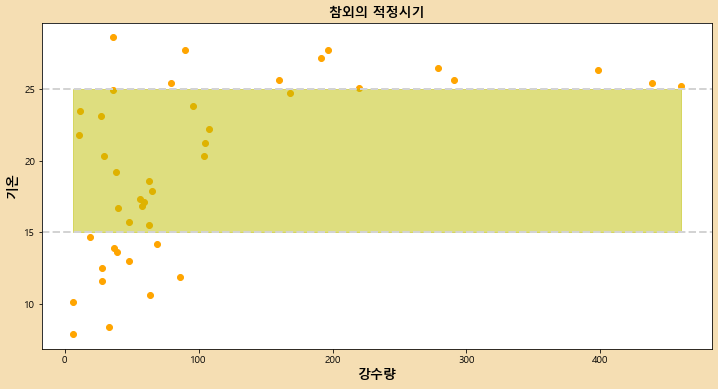

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams as rc

rc['font.family'] = 'Malgun Gothic'

app = pd.read_csv('chamoe_2023_fin.csv', low_memory=False, encoding='utf-8')

app_1 = app[(app['평균가격'] != 0)]
x = app_1['강수량(mm)']
y = app_1['평균기온(℃)']

X0 = [min(x), max(x)]
X1 = 15
X2 = 25

fig, ax = plt.subplots(figsize=(12, 6))

fig.patch.set_facecolor('wheat')

ax.scatter(x, y, color='orange')

ax.axhline(X1, 0, 1, color='lightgray', linestyle='--', linewidth=2)
ax.axhline(X2, 0, 1, color='lightgray', linestyle='--', linewidth=2)

ax.fill_between(X0, X1, X2, color='y', alpha=0.5)

ax.set_title('참외의 적정시기', fontsize=13, fontweight='bold')
ax.set_xlabel('강수량', fontsize=13, fontweight='bold')
ax.set_ylabel('기온', fontsize=13, fontweight='bold')

plt.savefig('chamoe_axhline.png', format='png')

plt.show()

In [3]:
overlap = app_1[(app_1['평균기온(℃)'] >= X1) & (app_1['평균기온(℃)'] <= X2)]

overlap_df = overlap[['날짜','평균가격','평균기온(℃)']]

# 예측모델을 사용해서 참외 가격 예측(온도)

In [20]:
import re
import pandas as pd

swsw=pd.read_csv('chamoe_2023_fin.csv',low_memory=False,encoding='utf-8')
swsw['날짜']=pd.to_datetime(swsw['날짜'])

a=input("날짜를 입력해주세요(1111-11-11 형식) :")

if not re.match(r'\d{4}-\d{2}-\d{2}', a):
    print("잘못 입력하셨습니다. 올바른 날짜 형식으로 입력하세요.")

else:
    date = pd.to_datetime(a)
    if date in swsw['날짜'].values:
        x = swsw[swsw['날짜'] == date]
        a = x['평균기온(℃)']
        b = int(x['평균가격'])
        a1 = reg.predict([a])
        a2 = a1.round(0)
        print('--------------------------')
        print(f' 기  온  :  {float(a)} ℃')
        print(f'예상가격 : {int(a2)} 원')
        print(f'원래가격 : {b} 원')
        print('--------------------------')
    else:
        print("없는 날짜입니다.")

날짜를 입력해주세요(1111-11-11 형식) :2024-05-28
--------------------------
 기  온  :  19.2 ℃
예상가격 : 16943 원
원래가격 : 17086 원
--------------------------


# 가설검정

In [21]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

boston = pd.read_csv("chamoe_2022_fin.csv")

x_data = boston[["평균기온(℃)","강수량(mm)"]]
target = boston[["평균가격"]]

multi_model = sm.OLS(target, x_data)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   평균가격   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              252.5
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                    9.12e-60
Time:                        16:25:31   Log-Likelihood:                         -2528.8
No. Observations:                 242   AIC:                                      5062.
Df Residuals:                     240   BIC:                                      5069.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
평균기온(℃)      624.3412     38.040     16.413      0.000     549.407     699.276
강수량(mm)       -9.0889      6.344     -1.433      0.153     -21.586       3.409
==============================================================================
Omnibus:                       50.712   Durbin-Watson:                   0.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.436
Skew:                           0.587   Prob(JB):                     8.15e-06
Kurtosis:                       2.027   Cond. No.                         8.88
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""